In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data"
df = pd.read_csv(url)
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [3]:
#Assigning column names
df.columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'Donated']

df.head()

,Recency,Frequency,Monetary,Time,Donated
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
X = df.drop('Donated', axis=1)
y = df['Donated']

In [5]:
target = LabelEncoder()
y = target.fit_transform(y)

In [6]:
clf = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [9]:
y_pred = clf.predict(X_test)

- Precisison : How many predicted positives are actually positive
- Recall : How many actual positives are correctly precdicted
- F1 Score : Balance score of precision and recall

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
prediction = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy: ', accuracy)
print('Precision: ', prediction)
print('Recall: ', recall)
print('F1: ', f1)

Accuracy:  0.7466666666666667
Precision:  0.47368421052631576
Recall:  0.24324324324324326
F1:  0.32142857142857145


<Axes: >

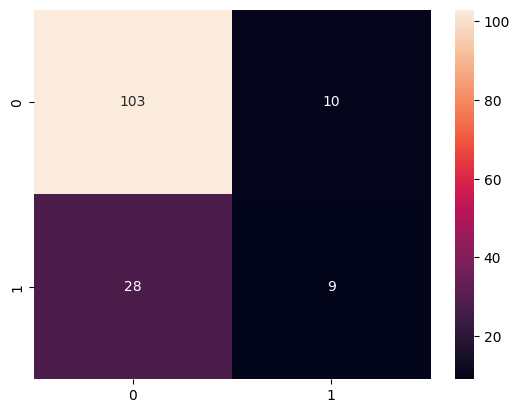

In [16]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cbar=True) #annot=True will add the numbers to the heatmap and fmt is the format of the numbers